In [2]:
import pandas as pd                # use for data analysis
import warnings                    # inform you potential issues in code but do not stop the execution.
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt    # also used for visualization
import seaborn as sns              # also used for visualization

In [3]:
file_path ="C:/Users/harsh/Desktop/futbal anaylsis_fri.xlsx" #we are setting up the file path for the excel file storing all the Data
appearances_df = pd.read_excel(file_path, sheet_name='appearances')#reading the "appearances" sheet from the Excel file and loads it into a DataFrame named appearances_df
players_df = pd.read_excel(file_path, sheet_name='players')#repeating the process for other sheets as well
games_df = pd.read_excel(file_path, sheet_name='games')
game_lineups_df = pd.read_excel(file_path, sheet_name='game_lineups')
game_events_df = pd.read_excel(file_path, sheet_name='game_events')

In [4]:
appearances_df #printing the appearances_df 

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [5]:
appearances_df.info() # to check the info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   appearance_id   3568 non-null   object        
 1   game_id         3568 non-null   int64         
 2   player_id       3568 non-null   int64         
 3   date            3568 non-null   datetime64[ns]
 4   player_name     3568 non-null   object        
 5   competition_id  3568 non-null   object        
 6   yellow_cards    3568 non-null   int64         
 7   red_cards       3568 non-null   int64         
 8   goals           3568 non-null   int64         
 9   assists         3568 non-null   int64         
 10  minutes_played  3568 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 306.8+ KB


In [6]:
# Select columns with data type 'object' which typically represents categorical data (e.g : strings)
categorical_columns = appearances_df.select_dtypes(include=['object']).columns.tolist() 

# Select columns with data types 'int64' or 'float64' which represent numerical data (e.g : integers, floats)
numerical_columns = appearances_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select columns with data type 'datetime64[ns]' which represents datetime data
datetime_columns = appearances_df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Print the combined list of categorical and datetime columns as they are treated similarly for this purpose
print("Categorical columns:", categorical_columns + datetime_columns)

# Print the list of numerical columns
print("Numerical columns:", numerical_columns)

Categorical columns: ['appearance_id', 'player_name', 'competition_id', 'date']
Numerical columns: ['game_id', 'player_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']


In [7]:
# Finding Null Values in columns
appearances_df_clean = appearances_df.isnull().sum()
appearances_df_clean

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [8]:
appearances_df_clean

appearance_id     0
game_id           0
player_id         0
date              0
player_name       0
competition_id    0
yellow_cards      0
red_cards         0
goals             0
assists           0
minutes_played    0
dtype: int64

In [9]:
players_df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [10]:
players_df.info() # to check the info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    152 non-null    int64         
 1   name                         152 non-null    object        
 2   last_season                  152 non-null    int64         
 3   current_club_id              152 non-null    int64         
 4   player_code                  152 non-null    object        
 5   country_of_birth             152 non-null    object        
 6   date_of_birth                152 non-null    datetime64[ns]
 7   sub_position                 152 non-null    object        
 8   position                     152 non-null    object        
 9   foot                         141 non-null    object        
 10  height_in_cm                 149 non-null    float64       
 11  market_value_in_eur          114 non-null    

In [13]:
players_df.isnull().sum()

player_id                       0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                           11
height_in_cm                    3
market_value_in_eur            38
highest_market_value_in_eur     4
contract_expiration_date       46
agent_name                     45
dtype: int64

In [16]:
# List of categorical columns to be identified from the DataFrame
categorical_columns = ['name', 'player_code', 'country_of_birth', 'sub_position', 'position', 'foot', 'agent_name']

# List of numerical columns to be identified from the DataFrame
numerical_columns = ['player_id', 'last_season', 'current_club_id', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']

# Handling missing values in numerical columns by replacing them with the mean value
for column in numerical_columns:
    players_df[column].fillna(players_df[column].mean(), inplace=True)

# dealing with the Nan values in catagorical columns    
players_df['contract_expiration_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Placeholder date for unknown
players_df['agent_name'].fillna('Unknown', inplace=True)
players_df['foot'].fillna('Unknown', inplace=True)

# Assigning the cleaned DataFrame to a new variable
players_clean_df = players_df

# Printing the count of missing values in each column to verify data cleaning
print(players_clean_df.isnull().sum())

player_id                      0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position                       0
foot                           0
height_in_cm                   0
market_value_in_eur            0
highest_market_value_in_eur    0
contract_expiration_date       0
agent_name                     0
dtype: int64


In [17]:
players_clean_df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.000000,2.000000e+06,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.000000,8.000000e+05,1800000.0,1900-01-01,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.000000,1.000000e+06,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.000000,1.400000e+07,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,Unknown,178.000000,5.000000e+06,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.000000,3.694298e+06,400000.0,1900-01-01,Unknown
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.000000,3.000000e+05,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.000000,4.000000e+05,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,Unknown,182.765101,3.694298e+06,4000000.0,1900-01-01,Unknown


In [18]:
games_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [19]:
games_df.info() # to check the info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 3268 non-null   int64         
 1   competition_id          3268 non-null   object        
 2   season                  3268 non-null   int64         
 3   round                   3268 non-null   object        
 4   date                    3268 non-null   datetime64[ns]
 5   home_club_goals         3268 non-null   int64         
 6   away_club_goals         3268 non-null   int64         
 7   home_club_position      2789 non-null   float64       
 8   away_club_position      2789 non-null   float64       
 9   home_club_manager_name  3263 non-null   object        
 10  away_club_manager_name  3263 non-null   object        
 11  stadium                 3268 non-null   object        
 12  attendance              3153 non-null   float64 

In [20]:
games_df.isnull().sum() 

game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee                      2
home_club_formation       3268
away_club_formation       3268
home_club_name             110
away_club_name              63
aggregate                    0
competition_type             0
dtype: int64

In [25]:
# List of categorical columns to be identified from the DataFrame
categorical_columns = ['competition_id', 'round', 'date', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type']

# List of numerical columns to be identified from the DataFrame
numerical_columns = ['game_id', 'season', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'attendance',]

# filling the missing values witht the median in numerical column & unknown in catagorical column
games_df['home_club_position'].fillna(games_df['home_club_position'].median(), inplace=True)
games_df['away_club_position'].fillna(games_df['away_club_position'].median(), inplace=True)
games_df['home_club_manager_name'].fillna('Unknown', inplace=True)
games_df['away_club_manager_name'].fillna('Unknown', inplace=True)
games_df['attendance'].fillna(games_df['attendance'].mean(), inplace=True)
games_df['referee'].fillna('Unknown', inplace=True)
games_df['home_club_name'].fillna('Unknown', inplace=True)
games_df['away_club_name'].fillna('Unknown', inplace=True)


# Assigning the cleaned DataFrame to a new variable
games_clean_df = games_df

# Printing the count of missing values in each column to verify data cleaning
print(games_clean_df.isnull().sum())

game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position           0
away_club_position           0
home_club_manager_name       0
away_club_manager_name       0
stadium                      0
attendance                   0
referee                      0
home_club_formation       3268
away_club_formation       3268
home_club_name               0
away_club_name               0
aggregate                    0
competition_type             0
dtype: int64


In [26]:
games_clean_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,9.0,9.0,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,Unknown,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [27]:
game_lineups_df

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [28]:
game_lineups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_lineups_id  219 non-null    object
 1   game_id          219 non-null    int64 
 2   type             219 non-null    object
 3   number           219 non-null    int64 
 4   player_id        219 non-null    int64 
 5   player_name      219 non-null    object
 6   team_captain     219 non-null    int64 
 7   position         219 non-null    object
dtypes: int64(4), object(4)
memory usage: 13.8+ KB


In [30]:
(game_lineups_df.isnull().sum())

game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64


In [31]:
game_events_df

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [32]:
game_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_event_id     1849 non-null   object        
 1   date              1849 non-null   datetime64[ns]
 2   game_id           1849 non-null   int64         
 3   minute            1849 non-null   int64         
 4   type              1849 non-null   object        
 5   player_id         1849 non-null   int64         
 6   description       916 non-null    object        
 7   player_in_id      1155 non-null   float64       
 8   player_assist_id  140 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 130.1+ KB


In [36]:
# List of categorical columns to be identified from the DataFrame
categorical_columns = ['game_event_id', 'date', 'type', 'description']

# List of numerical columns to be identified from the DataFrame
numerical_columns = ['game_id', 'minute', 'player_id', 'player_in_id', 'player_assist_id']

# Filling null values in 'game events'
game_events_df['description'].fillna('No description', inplace=True)
game_events_df['player_in_id'].fillna(0, inplace=True)  # Assuming 0 can be used as a sub value for no substitution
game_events_df['player_assist_id'].fillna(0, inplace=True)  # Assuming 0 can be used as a sub value for no assist


# Assigning the cleaned DataFrame to a new variable
game_events_clean_df = game_events_df

# Printing the count of missing values in each column to verify data cleaning
print(game_events_clean_df.isnull().sum())

game_event_id       0
date                0
game_id             0
minute              0
type                0
player_id           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64


In [37]:
game_events_clean_df

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,0.0
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",0.0,0.0
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,0.0
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,0.0
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",0.0,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",0.0,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",0.0,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,0.0
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,0.0


# Merging on common grounds 

In [38]:
# Merging games_clean_df with game_lineups_df on 'game_id' column using a left join
merged_df = pd.merge(games_clean_df, game_lineups_df, on='game_id', how = 'left')
merged_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,away_club_name,aggregate,competition_type,game_lineups_id,type,number,player_id,player_name,team_captain,position
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,FK Krasnodar,02:03:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,Sonderjyske Fc,01:02:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,Sonderjyske Fc,02:00:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,BRA NDBYERNES,00:03:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,Odense Boldklub,00:01:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,9.0,9.0,Erik ten Hag,...,Unknown,07:00:00,domestic_cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,Hobro IK,03:02:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,Stoke City,05:01:00,domestic_league,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Further merging the resulting DataFrame with game_events_df on 'game_id' column using a left join
merged_df = pd.merge(merged_df,game_events_df, on='game_id', how='left')
merged_df

,game_id,competition_id,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,team_captain,position,game_event_id,date_y,minute,type_y,player_id_y,description,player_in_id,player_assist_id
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,3296153,NLP,2019,Round of 16,2020-01-22,7,0,9.0,9.0,Erik ten Hag,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3449,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,NaN,NaN,237567d50f0a3d2c545dc4776a8321f6,2017-12-10,84.0,Substitutions,542776.0,No description,148343.0,0.0
3450,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,NaN,NaN,d3e7898d2f3e2ee405a0caa5e23ad4fb,2018-10-20,30.0,Substitutions,411302.0,No description,204347.0,0.0
3451,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Further merging the resulting dataFrame with appearances_df on 'game_id' column using a left join
merged_df = pd.merge(merged_df, appearances_df, on='game_id', how='left')
merged_df

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,appearance_id,player_id,date,player_name_y,competition_id_y,yellow_cards,red_cards,goals,assists,minutes_played
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,2222734_104203,104203,2012-12-07,Eugene Starikov,RU1,0,0,0,0,38
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,2224572_161244,161244,2012-07-28,Conor O'Brien,DK1,0,0,0,0,90
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,2224628_46472,46472,2013-03-08,Charlie Davies,DK1,0,0,0,0,18
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,2224655_39467,39467,2013-03-10,Clarence Goodson,DK1,0,0,0,0,90
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,2224729_39467,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2875216_381187,381187,2017-12-10,Emmanuel Sabbi,DK1,0,0,0,0,8
3805,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,2875216_542776,542776,2017-12-10,Jonathan Amon,DK1,0,0,0,0,84
3806,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,3099247_411302,411302,2018-10-20,Brendan Hines-Ike,BE1,0,0,0,0,30
3807,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,2872273_31642,31642,2017-12-09,Geoff Cameron,GB1,0,0,0,0,15


In [41]:
# # Final merge with players_clean_df on 'player_id' column using a left join
final_merged_df = pd.merge(merged_df,players_clean_df, on='player_id', how='left')
final_merged_df

,game_id,competition_id_x,season,round,date_x,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,...,UdSSR,1988-11-17,Centre-Forward,Attack,right,175.0,3.694298e+06,500000.0,1900-01-01,Prosport
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,3.694298e+06,750000.0,1900-01-01,Unknown
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,...,United States,1986-06-25,Centre-Forward,Attack,right,178.0,3.694298e+06,2200000.0,1900-01-01,Unknown
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,3.694298e+06,1850000.0,1900-01-01,Unknown
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,...,United States,1982-05-17,Centre-Back,Defender,right,193.0,3.694298e+06,1850000.0,1900-01-01,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,Italy,1997-12-24,Right Winger,Attack,right,178.0,8.000000e+05,1000000.0,2027-06-30,Avid Sports Group
3805,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,...,United States,1999-04-30,Left Winger,Attack,right,175.0,3.000000e+05,700000.0,2024-06-30,Unknown
3806,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,...,United States,1994-11-30,Centre-Back,Defender,right,185.0,8.000000e+05,800000.0,2024-12-31,CAA Stellar
3807,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,...,United States,1985-07-11,Centre-Back,Defender,right,190.0,3.694298e+06,5000000.0,1900-01-01,CMG Sports


In [42]:
final_merged_df.isnull().sum()

game_id                           0
competition_id_x                  0
season                            0
round                             0
date_x                            0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                        0
referee                           0
home_club_formation            3809
away_club_formation            3809
home_club_name                    0
away_club_name                    0
aggregate                         0
competition_type                  0
game_lineups_id                3809
type_x                         3809
number                         3809
player_id_x                    3809
player_name_x                  3809
team_captain                   3809
position_x                     3809
game_event_id               

In [ ]:
final_merged_df.drop(columns=['home_club_formation','away_club_formation',
'game_lineups_id',                        
'type_x',                  
'number',                  
'player_id_x',                   
'player_name_x',                     
'team_captain',                  
'position_x',                         
'game_event_id',                         
'date_y',                         
'minute',                    
'type_y',                   
'player_id_y',                   
'description',
'player_in_id',
'player_assist_id'], inplace=True)

In [45]:
final_merged_df.isnull().sum()

game_id                        0
competition_id_x               0
season                         0
round                          0
date_x                         0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
appearance_id                  0
player_id                      0
date                           0
player_name_y                  0
competition_id_y               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
name                           0
last_season                    0
current_cl

# Checking current working directory

In [46]:
import os
print(os.getcwd())

C:\Users\harsh


In [47]:
# Exporting the final_merged_df to CSV
final_merged_df.to_csv('Final_merged_data_football.csv', index=False)
print("DataFrame has been saved to 'Final_merged_data_football.csv")

DataFrame has been saved to 'Final_merged_data_football.csv


# Performance Analysis

In [ ]:
# Objective 1 : Visualizing total number of goals scored by top 5  players at home 

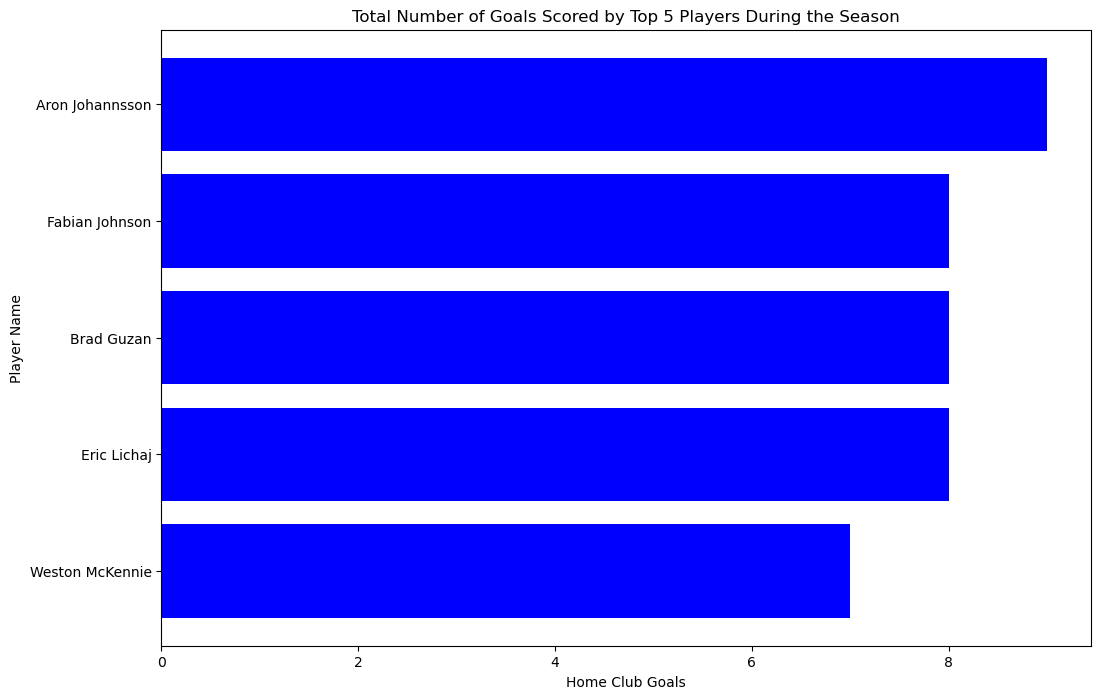

In [3]:
# Load the CSV file
file_path = "C:/Users/harsh/Final_merged_data_futball_analysis.csv"
df = pd.read_csv(file_path)

# Assuming the dataframe has columns 'name' and 'total_goals'
# Sort the dataframe by total_goals in descending order and select the top 5 players
top_5_goal_scorers = df.sort_values(by='home_club_goals', ascending=False).head(7)

# Plot the total number of goals scored by each of the top 5 players
plt.figure(figsize=(12, 8))
plt.barh(top_5_goal_scorers['name'], top_5_goal_scorers['home_club_goals'], color='blue')
plt.xlabel('Home Club Goals')
plt.ylabel('Player Name')
plt.title('Total Number of Goals Scored by Top 5 Players During the Season')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most goals at the top
plt.show()

In [ ]:
# Objective 2 :  Total number of games played by each player during the season at home 

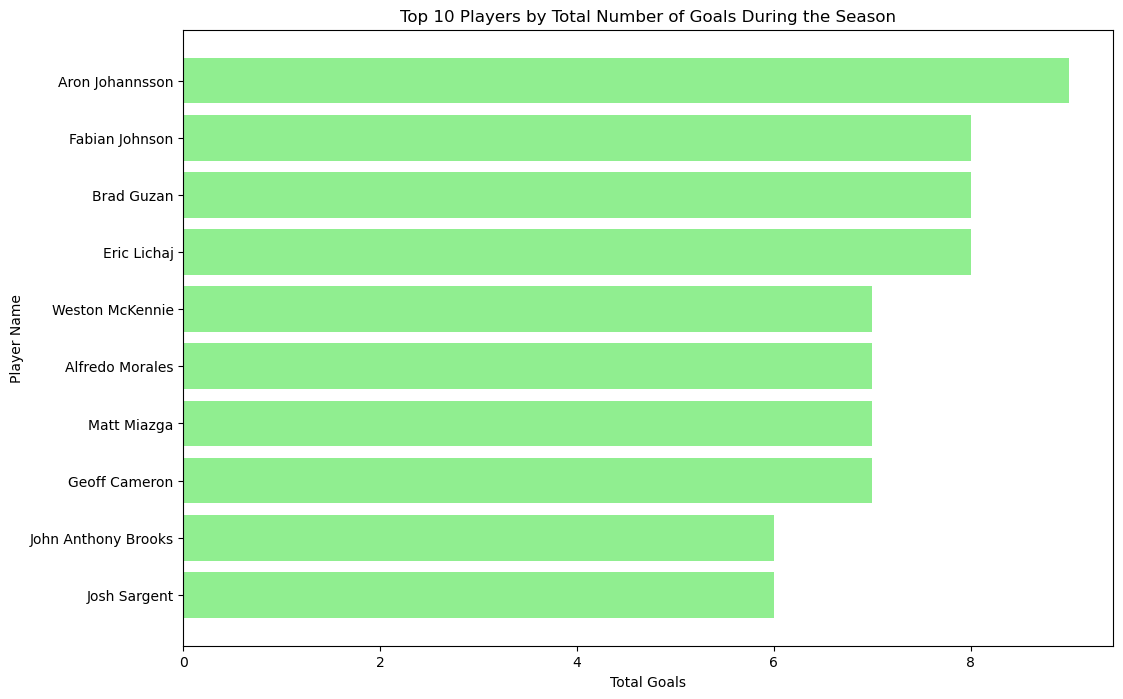

In [5]:
# Load the CSV file
file_path = "C:/Users/harsh/Final_merged_data_futball_analysis.csv"
df = pd.read_csv(file_path)

# Extracting relevant columns for visualization
# Assuming 'name' corresponds to player name and 'home_club_goals' is used as a proxy for total games
games_played = df[['name', 'home_club_goals']].sort_values(by='home_club_goals', ascending=False)

# Select top 10 players
top_10_players = games_played.head(21)

# Plot the total number of games played by each player
plt.figure(figsize=(12, 8))
plt.barh(top_10_players['name'], top_10_players['home_club_goals'], color='lightgreen')
plt.xlabel('Total Goals')
plt.ylabel('Player Name')
plt.title('Top 10 Players by Total Number of Goals During the Season')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most games at the top
plt.show()